<div class="alert alert-block alert-success">
<b>V2 Успех:</b> Кирилл, ты исправил все доработки и я поздравляю тебя с успешным выполнением проекта. Это начало интересного и непростого пути, на котором ты сделал следующий шаг. Проект зачтен, я думаю он получился крутым, надеюсь тебе было интересно. Еще раз поздравляю!
</div>

**Привет, Кирилл!** 
<br> Меня зовут Родион Щебентовский, сегодня я буду проверять твой проект. Моя цель при проверке - помочь тебе с освоением темы статистического анализа и порадоваться, когда ты сделаешь классную работу :) 
<br> Предлагаю в общении перейти на "ты", если тебе так комфортно. 
<br> Будет здорово, если будешь реагировать на мои комментарий ('исправил', 'не понял как исправить ошибку', ...) и я смогу дать более подробную информацию по неразрешенным вопросам.

<br> Пожалуйста, не удаляй мои комментарии во время доработки, так мы сможем быть в одном контексте и работа будет проверяться быстрее.

Комментарии будут в <font color='green'>зеленой</font>, <font color='orange'>желтой</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-warning">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Необходимо исправить: </b> Работа не может быть принята с красными комментариями.
</div>

Буду рад, если ты оформишь свои комментарии так: 

<div class="alert alert-info" role="alert">
  <b>Комментарий студента: </b> Здесь будет твой вопрос.
</div>


<font color='blue'>**Общее впечатление**</font>
* Этот проект выполнен хорошо, некоторые идеи достаточно оригинальны.
* Молодец, что структурируешь ноутбук, приятно проверять такие работы.
* В работе допущено несколько ошибок, которые достаточно легко исправить.
* Я оставил несколько советов, они позволят тебе глубже изучить тему и привести работу в еще лучшее состояние. Исправь их если останется время.
* Порадовало достаточно качественное оформление графиков, спасибо!
* Жду новую версию проекта. Уверен, ты справишься :) 

<div class="alert alert-info">
<b> Комментарий от студента </b>
    
Привет, меня зовут Кирилл. Предлагаю сразу перейти на "ты" для удобства общения. Свои комментарии по ходу проверки буду оставлять в подобной форме. 
    
Спасибо, что проверяешь мой проект! Буду рад любым замечаниям и предложениям, успехов в работе!
</div>

# Описание проекта

Заказчик исследования - федеральный оператор сотовой связи "Мегалайн". Клиентам предлагается два тарифных плана: "Смарт" и "Ультра". Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег. 

Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей "Мегалайна": кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

Необходимо проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов
#### Тариф "Смарт"
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    * Минута разговора: 3 рубля
    * Сообщение: 3 рубля
    * 1 Гб интернет-трафика: 200 рублей

#### Тариф "Ультра"
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    * Минута разговора: 1 рубль
    * Сообщение: 1 рубль
    * 1 Гб интернет-трафика: 150 рублей
    
    
#### Примечание
"Мегалайн" всегда округляет секунды до минут, а мегабайта – до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута. 

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в большую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайт.

## 1. Изучение данных из файлов

In [73]:
# Импортируем необходимые для работы библиотеки

from scipy import stats as st
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import math

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе выполнения.
</div>

In [74]:
# Читаем данные из полученных .csv файлов
# Воспользуемся универсальной конструкцией для подгрузки файла как с сервера, так и локально

# Локальные пути
pth1_1 = 'users.csv'
pth1_2 = 'calls.csv'
pth1_3 = 'internet.csv'
pth1_4 = 'messages.csv'
pth1_5 = 'tariffs.csv'

# Серверные пути
pth2_1 = '/datasets/users.csv'
pth2_2 = '/datasets/calls.csv'
pth2_3 = '/datasets/internet.csv'
pth2_4 = '/datasets/messages.csv'
pth2_5 = '/datasets/tariffs.csv'

if os.path.exists(pth1_1):
    data_users = pd.read_csv(pth1_1)
    data_calls = pd.read_csv(pth1_2)
    data_internet = pd.read_csv(pth1_3)
    data_messages = pd.read_csv(pth1_4)
    data_tariffs = pd.read_csv(pth1_5)
elif os.path.exists(pth2_1):
    data_users = pd.read_csv(pth2_1)
    data_calls = pd.read_csv(pth2_2)
    data_internet = pd.read_csv(pth2_3)
    data_messages = pd.read_csv(pth2_4)
    data_tariffs = pd.read_csv(pth2_5)
else:
    print('Something is wrong. Check path')

<div class="alert alert-block alert-success">
<b>Успех:</b> Хорошее оформление путей
</div>

In [75]:
# Выводим первые 5 строк датафреймов
    
data_list = [data_users, data_calls, data_internet, data_messages, data_tariffs]
    
for i in data_list:
    display(i.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [76]:
# Выводим информацию о таблицах

for i in data_list:
    display(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

### Выводы

Исходные данные декомпозированы на 5 таблиц, содержащих в себе следующую информацию:
* `data_users` - хранит информацию о пользователях. Основная таблице;
* `data_calls` - хранит информацию о звонках. Связана с основной таблицей по идентификатору пользователя (user_id);
* `data_messages` - хранит информацию о сообщениях. Связана с основной таблицей по идентификатору пользователя (user_id);
* `data_internet` - хранит информацию об интернет-сессиях. Связана с основной таблицей по идентификатору пользователя (user_id);
* `data_traffic` - хранит информацию о тарифах. Является вспомогательной таблицей.

В следующей главе приведенные таблицы будут более подробно рассмотрены с точки зрения типов и ошибок данных.

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, первый взгляд сделан, можем приступать к подготовке данных.
</div>

## 2. Подготовка данных

### 2.1. Предобработка данных

В данной главе выполним подготовку данных для последующего исследования. Необходимо проверить данные на наличие дубликатов, пропусков, некорректных типов данных, некорректного наименования колонок и иных проблем, которые внести погрешности в анализ данных.

Поочередно детально рассмотрим каждую из таблиц. Начнем с таблицы `data_users`. Выведем первые 10 строк таблицы и основную информацию.

#### 2.1.1 Предобработка таблицы `data_users`

In [77]:
# Вывод таблицы data_users и информацию о ней

display(data_users.head(10))
display(data_users.info())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

Для корректной обработки таблицы необходимо понять, за что отвечает каждая из колонок таблицы. Обратимся к документации.

* `user_id` - уникальный идентификатор пользователя;
* `age` - возраст пользователя (годы);
* `churn_date` - дата прекращения пользования тарифом;
* `city` - город проживания пользователя;
* `first_name` - имя пользователя;
* `last_name` - фамилия пользователя;
* `reg_date` - дата подключения тарифа;
* `tariff` - название тарифного плана.

Чек-лист для предобработки данной таблицы:
- [x] колонку `churn_date` преобразовать в datetime формат
- [x] проанализировать пропуски в колонке `churn_date`
- [x] проанализировать `age` на наличие аномалий
- [x] проанализировать `city` на наличие неявных дубликатов
- [x] колонку `reg_date` преобразовать в datetime формат
- [x] проанализировать `tariff` на наличие аномалий

In [78]:
# Проверяем столбец `age` на наличие аномалий

data_users['age'].describe()

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

**Аномалий в столбце `age` не обнаружено.**

In [79]:
# Проверяем столбец `city` на неявных дубликатов

data_users['city'].sort_values().unique()

array(['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород',
       'Брянск', 'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград',
       'Волжский', 'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург',
       'Иваново', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Калуга',
       'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Красноярск',
       'Курган', 'Курск', 'Липецк', 'Магнитогорск', 'Махачкала', 'Москва',
       'Мурманск', 'Набережные Челны', 'Нижневартовск', 'Нижний Новгород',
       'Нижний Тагил', 'Новокузнецк', 'Новороссийск', 'Новосибирск',
       'Омск', 'Оренбург', 'Орёл', 'Пенза', 'Пермь', 'Петрозаводск',
       'Подольск', 'Ростов-на-Дону', 'Рязань', 'Самара',
       'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь', 'Смоленск',
       'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов', 'Тверь',
       'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск',
       'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец',
       'Чи

**Неявные дубликаты в столбце `age` не обнаружены.**

In [80]:
# Проверяем столбец `tariff` на неявные дубликатов

data_users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

**Аномалии в столбце `age` не обнаружены.**

Пропуски в колонке `churn_date`, согласно полученной документации, говорят о том, что клиент в настоящее время пользуется данным тарифом.

Для избавления от пропущенных значений, заменим `NaN` в столбце `churn_date` на значение `2038-01-19`, учитывая проблему "2038 года".

В последующем анализе учтем, что дата `2038-01-19` сигнализирует о том, что тариф в настоящее время активен.

In [81]:
# Выведим все строки, где churn_date != NaN.
# Воспользуемся для этого особым свойством NaN: NaN не равно самому себе.
# С помощью query выводим все строки, для которых Age == Age, т.е. Age != NaN.

data_users.query('churn_date == churn_date').head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
19,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra
20,1020,59,2018-12-18,Чита,Тала,Костина,2018-10-22,smart
34,1034,66,2018-11-21,Вологда,Святослав,Бондарев,2018-08-26,smart
50,1050,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra
51,1051,37,2018-10-14,Москва,Кристина,Сомова,2018-05-28,smart
56,1056,73,2018-10-14,Иркутск,Радислав,Артемьев,2018-04-13,smart
62,1062,24,2018-12-09,Москва,Александр,Коршунов,2018-11-16,smart
63,1063,45,2018-12-11,Тула,Таира,Климова,2018-04-12,ultra
64,1064,55,2018-12-26,Якутск,Динара,Алфеева,2018-03-17,smart
65,1065,53,2018-12-09,Москва,Роза,Игнатова,2018-03-08,smart


In [82]:
# Заполняем пропущенные значения в столбце `churn_date`

data_users['churn_date'] = data_users['churn_date'].fillna('2038-01-19')

In [83]:
# Преобразуем столбы `churn_date` и `reg_date` к типу данных datetime

data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d')
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')

**Пропуски таблицы `data_users` заполнены. Столбцы `churn_date`, `reg_date` приведены к типу `datetime`**

In [84]:
# Проверим таблицу на наличие явных дубликатов

print('Число дубликатов в таблице data_users:', data_users.duplicated().sum())

Число дубликатов в таблице data_users: 0


**Дубликаты в таблице `data_users` отсутствуют.**

In [85]:
# Проверяем результаты предобработки таблицы `data_users`

display(data_users.head(10))
display(data_users.info())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,2038-01-19,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,2038-01-19,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,2038-01-19,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,2038-01-19,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,2038-01-19,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,2038-01-19,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,2038-01-19,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,2038-01-19,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,2038-01-19,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,2038-01-19,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  500 non-null    datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


None

**Предобработка таблицы `data_users` завершена.**

#### 2.1.2 Предобработка таблицы `data_calls`

In [86]:
# Вывод таблицы data_calls и информацию о ней

display(data_calls.head(10))
display(data_calls.info())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

Для корректной обработки таблицы необходимо понять, за что отвечает каждая из колонок таблицы. Обратимся к документации.

* `id` - уникальный номер звонка. Предполагается, что в форме записи x_y (x - id пользователя, y - id звонка пользователя);
* `call_date` - дата звонка;
* `duration` - длительность звонка в минутах;
* `user_id` - идентификатор пользователя, сделавшего звонок.

Чек-лист для предобработки данной таблицы:
- [x] столбец `call_date` преобразован к типу `datetime`
- [x] данные в столбце `duration` округлены по правилам документации
- [x] столбец `duration` приведен с целочисленному типу
- [x] проверить `duration` на наличие аномалий
- [x] проверить таблицу на наличие дубликатов

In [87]:
# Преобразуем столбец `call_date` к типу данных datetime

data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')

In [88]:
# Округлим данные в столбце `duration` по правилам, указанным в документации
# Согласно документации звонки с нулевой продолжительностью - это пропущенные звонки. Округлять их не требуется.
# Каждый звонок округляется отдельно. Даже если он длился 1 секунду, будет засчитан как 1 минута. 
# Исходя из требований округлим не нулевые значения столбца `duration` в большую сторону до целого числа.

data_calls['duration'] = np.ceil(data_calls['duration']).astype(int)

<div class="alert alert-block alert-success">
<b>Успех:</b> Здорово, что используешь np.ceil
</div>

In [89]:
# Проверим стобец `duration` на наличие аномалий

data_calls['duration'].describe()

count    202607.000000
mean          7.158198
std           5.959173
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64

**Аномалии в столбце `duration` не обнаружены.**

In [90]:
# Проверяем таблицу на наличие дубликатов

print('Число дубликатов в таблице data_calls:', data_calls.duplicated().sum())

Число дубликатов в таблице data_calls: 0


**Дубликаты в таблице `data_calls` отсутствуют.**

In [91]:
# Проверяем результаты предобработки таблицы `data_calls`

display(data_calls.head(10))
display(data_calls.info())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
5,1000_5,2018-11-02,0,1000
6,1000_6,2018-10-18,0,1000
7,1000_7,2018-08-22,19,1000
8,1000_8,2018-09-15,19,1000
9,1000_9,2018-08-15,0,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


None

**Предобработка таблицы `data_calls` завершена.**

#### 2.1.3 Предобработка таблицы `data_internet`

In [92]:
# Вывод таблицы data_internet и информацию о ней

display(data_internet.head(10))
display(data_internet.info())

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

Для корректной обработки таблицы необходимо понять, за что отвечает каждая из колонок таблицы. Обратимся к документации.

* `id` - уникальный номер сессии. Предполагается, что в форме записи x_y (x - id пользователя, y - id сессии пользователя);
* `session_date` - дата сессии;
* `mb_used` - объем потраченного за сессию интернет-трафика (в мегабайтах);
* `user_id` - идентификатор пользователя, сделавшего звонок.

Чек-лист для предобработки данной таблицы:
- [x] Определено назначение столбца `Unnamed: 0`
- [x] Выполнен анализ столбца `mb_used`
- [x] Стобец `session_date` приведен к типу `datetime`
- [x] Проверить таблицу на наличие дубликатов

В таблице встречается колонка `Unnamed: 0`, информации по данной колонке в документации не присутствует. Вероятнее всего, появление этого столбца - результат работы `pandas.DataFrame.to_csv` без указания `index=False`. 

Избавимся от "Индекса по умолчанию". Для этого перепрочитаем файл с таблицей с добавлением `index_col=[0]`

In [93]:
# Воспользуемся универсальной конструкцией для подгрузки файла как с сервера, так и локально

# Локальный путь
pth1_3 = 'internet.csv'

# Серверный путь
pth2_3 = '/datasets/internet.csv'

if os.path.exists(pth1_1):
    data_internet = pd.read_csv(pth1_3, index_col=[0])
elif os.path.exists(pth2_1):
    data_internet = pd.read_csv(pth2_3, index_col=[0])
else:
    print('Something is wrong. Check path')
    
# Выводим результат переподгрузки таблицы
display(data_internet.head())

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


<div class="alert alert-block alert-warning">
<b>Совет: </b> Не уловил, зачем мы повторно считываем данные. Возможно это артефакт дебага? 
</div>

<div class="alert alert-info">
<b> Комментарий от студента </b>
    
Дело в том, что при считывании данных изначально я не указывал index_col=[0], из-за чего в таблице data_internet появлялась дополнительная колонка Unnamed: 0. Быстрое решение, которое пришло на ум - перепрочитать данные. Это можно было бы и сделать в самом начале работы, но тогда потерялась бы логика и последовательность действий. Если есть способ более элегатного решения этой проблемы - буду рад узнать.
</div>

Рассмотрим столбец таблицы `mb_used`. Согласно документации, для веб-трафика отдельные сессии не подлежат округлению. Вместо этого общая сумма за месяц округляется в большую сторону. Округление идет в большую сторону до Гигабайта (например, если пользователь потратил за месяц 1025 мегабайт, то с него возьмут плату за 2 гигабайта). В этом случае логичнее оставить столбец `mb_used` в вещественном типе данных без округления.

Приведем столбец `session_date` к типу `datetime`.

In [94]:
# Преобразуем столбец `session_date` к типу данных datetime

data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')

In [95]:
# Проверим стобец `mb_used` на наличие аномалий

data_internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

**Аномалии в столбце `mb_used` не обнаружены.**

In [96]:
# Проверяем таблицу на наличие дубликатов

print('Число дубликатов в таблице data_internet:', data_internet.duplicated().sum())

Число дубликатов в таблице data_internet: 0


**Дубликаты в таблице `data_internet` отсутствуют.**

In [97]:
# Проверяем результаты предобработки таблицы `data_internet`

display(data_internet.head(10))
display(data_internet.info())

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


None

**Предобработка таблицы `data_internet` завершена.**

#### 2.1.4 Предобработка таблицы `data_messages`

In [98]:
# Вывод таблицы data_messages и информацию о ней

display(data_messages.head(10))
display(data_messages.info())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

Для корректной обработки таблицы необходимо понять, за что отвечает каждая из колонок таблицы. Обратимся к документации.

* `id` - уникальный номер сообщения. Предполагается, что в форме записи x_y (x - id пользователя, y - id сообщения);
* `message_date` - дата сообщения;
* `user_id` - идентификатор пользователя, отправившего сообщение.

Чек-лист для предобработки данной таблицы:
- [x] Стобец `message_date` приведен к типу `datetime`
- [x] Проверить таблицу на наличие дубликатов

In [99]:
# Преобразуем столбец `message_date` к типу данных datetime

data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')

In [100]:
# Проверяем таблицу на наличие дубликатов

print('Число дубликатов в таблице data_messages:', data_messages.duplicated().sum())

Число дубликатов в таблице data_messages: 0


**Дубликаты в таблице `data_messages` отсутствуют.**

In [101]:
# Проверяем результаты предобработки таблицы `data_messages`

display(data_messages.head(10))
display(data_messages.info())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


None

**Предобработка таблицы `data_internet` завершена.**

#### 2.1.5 Предобработка таблицы `data_tariffs`

In [102]:
# Вывод таблицы data_tariffs и информацию о ней

display(data_tariffs.head())
display(data_tariffs.info())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

Для корректной обработки таблицы необходимо понять, за что отвечает каждая из колонок таблицы. Обратимся к документации.

* `messages_included` - количество сообщений в месяц включенных в абонентскую плату;
* `mb_per_month_included` - объём интернет-трафика, включённого в абонентскую плату (в мегабайтах);
* `minutes_included` - количество минут разговора в месяц, включённых в абонентскую плату;
* `rub_monthly_fee` - ежемесячная абонентская плата в рублях;
* `rub_per_gb` - стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта);
* `rub_per_message` - стоимость отправки сообщения сверх тарифного пакета;
* `rub_per_minute` - стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата);
* `tariff_name` - название тарифа.

Чек-лист для предобработки данной таблицы:
- [x] Проверить данные в таблице на соответствие документации

Данные в таблице полностью соответствуют документации. Таблица не нуждается в дополнительной предобработке.

**Предобработка таблицы `data_tariffs` завершена.**

#### Выводы

В результате работы была выполнена предобработка исходных данных. Данные были приведены к нужным типам, был произведен анализ таблиц на наличие аномалий и дубликатов. 

Данные готовы для дальнейшего анализа.

<div class="alert alert-block alert-success">
<b>Успех:</b> Хорошая предобработка
</div>

### 2.2. Расчет и добавление дополнених данных

Необходимо расчитать для каждого пользователя:
- [x] Количество сделанных звонков по месяцам
- [x] Количество израсходованных минут по месяца
- [x] Количество отправленных сообщений по месяцам
- [x] Количество израсходованного интернет-трафика по месяцам (в гигабайтах)
- [x] Помесячную выручку с каждого пользователя

Создадим отдельный датафрейм, который постепенно будем наполнять необходимой нам информацией для дальнейшего анализа.

Для того, чтобы понять какие данные нам понадобятся необходимо понять цели исследования. Согласно полученному ТЗ необходимо:
* Описать поведение клиентов исходя из полученной выборки для каждого вида тарифа;
* Посчитать дисперсию, среднее количество, стандартное отклонение;
* Построить гистрограммы, описать распределения;
* Проверить гипотезу, что средняя выручка пользователей двух тарифов отличаются;
* Проверить гипотезу, что средняя выручка пользователей из Москвы отличается от пользователей других регионов.

Исходя из наших задач по ходу работы будет допольнять, удалять, деперсонализировать данные относительно поставленных задач.

#### 2.2.1. Подсчет данных по месяцам

In [103]:
# Добавление стобца с номером месяца для каждого пользователя
data_calls['month'] = data_calls['call_date'].dt.month

# Считаем общую длительность звонков каждого клиента по месяцам
data_group_duration_calls = data_calls.groupby(['user_id', 'month'], as_index=False).agg({'duration': 'sum'}).reset_index(drop=True)
data_group_duration_calls.rename(columns={'duration': 'calls_duration'}, inplace=True)

# Cчитаем количество звонков каждого клиента по месяцам
data_group_count_calls = data_calls.groupby(['user_id', 'month'], as_index=False).agg({'duration': 'count'}).reset_index(drop=True)
data_group_count_calls.rename(columns={'duration': 'calls_count'}, inplace=True)

# Склеиваем получившиеся таблицы в таблицу data_group
data_group = pd.merge(left=data_group_duration_calls, 
                      right=data_group_count_calls, 
                      how='outer', on=['user_id', 'month'])
display(data_group)

,user_id,month,calls_duration,calls_count
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58
...,...,...,...,...
3169,1498,10,247,41
3170,1499,9,70,9
3171,1499,10,449,68
3172,1499,11,612,74


In [104]:
# Добавление стобца с номером месяца для каждого пользователя
data_messages['month'] = data_messages['message_date'].dt.month
data_messages['user_id_copy'] = data_messages['user_id']

# Cчитаем количество сообщений каждого клиента по месяцам
data_group_count_messages = data_messages.groupby(['user_id', 'month'], as_index=False).agg({'user_id_copy': 'count'}).reset_index(drop=True)
data_group_count_messages.rename(columns={'user_id_copy': 'messages_count'}, inplace=True)

# Склеиваем получившуюся таблицу к таблице data_group
data_group = pd.merge(left=data_group, 
                      right=data_group_count_messages, 
                      how='outer', on=['user_id', 'month'])
display(data_group)

,user_id,month,calls_duration,calls_count,messages_count
0,1000,5,159.0,22.0,22.0
1,1000,6,172.0,43.0,60.0
2,1000,7,340.0,47.0,75.0
3,1000,8,408.0,52.0,81.0
4,1000,9,466.0,58.0,57.0
...,...,...,...,...,...
3208,1489,8,NaN,NaN,17.0
3209,1489,9,NaN,NaN,32.0
3210,1489,10,NaN,NaN,21.0
3211,1489,11,NaN,NaN,20.0


In [106]:
# Добавление стобца с номером месяца для каждого пользователя
data_internet['month'] = data_internet['session_date'].dt.month

# Считаем общую сумму трафика каждого клиента по месяцам
data_group_internet_used = data_internet.groupby(['user_id', 'month'], as_index=False).agg({'mb_used': 'sum'}).reset_index(drop=True)
display(data_group_internet_used)

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


In [107]:
# Напишем функцию, которая переведет количество использованных мегабайт в месяце в количество гигабайт
# Будем руководствоваться правилами округления, представленными в ТЗ
# В конце месяца весь трафик клиента округляется в большую сторону до целого числа гигабайтов

def gb_used(row):
    try:
        if row['mb_used'] != 0:
            gb = row['mb_used'] / 1024
            gb = np.ceil(gb)
            return gb
        else:
            return 0
    except:
        return (print('Something wrong, check func gb_used'))
    
data_group_internet_used['gb_used'] = data_group_internet_used.apply(gb_used, axis=1)
data_group_internet_used = data_group_internet_used.drop(['mb_used'], axis=1)
display(data_group_internet_used)

,user_id,month,gb_used
0,1000,5,3.0
1,1000,6,23.0
2,1000,7,14.0
3,1000,8,14.0
4,1000,9,15.0
...,...,...,...
3198,1498,10,21.0
3199,1499,9,2.0
3200,1499,10,18.0
3201,1499,11,18.0


<div class="alert alert-block alert-success">
<b>Успех:</b> Понравилось, что собрал функцию,молодец.
</div>

<div class="alert alert-block alert-success">
<b>Необходимо исправить: </b> Хорошим вариантом здесь будет продолжить использовать np.ceil, она на крайних значениях иногда может давать отличные от math результаты. 
</div>

<div class="alert alert-info">
<b> Комментарий от студента </b>
    
Понял, поправил
</div>

In [108]:
# Склеим таблицу с расчетом использованого интернет трафика с общей таблицей

data_group = pd.merge(left=data_group, 
                      right=data_group_internet_used, 
                      how='outer', on=['user_id', 'month'])
display(data_group)

,user_id,month,calls_duration,calls_count,messages_count,gb_used
0,1000,5,159.0,22.0,22.0,3.0
1,1000,6,172.0,43.0,60.0,23.0
2,1000,7,340.0,47.0,75.0,14.0
3,1000,8,408.0,52.0,81.0,14.0
4,1000,9,466.0,58.0,57.0,15.0
...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.0,17.0
3210,1489,10,NaN,NaN,21.0,20.0
3211,1489,11,NaN,NaN,20.0,18.0
3212,1489,12,NaN,NaN,35.0,17.0


Далее склеим полученную таблицу `data_group` с таблицей `data_users`

In [109]:
# Склеиваем таблицы `data_group` с таблицей `data_users`

display(data_users.head(10))

data_group_total = pd.merge(left=data_group, 
                            right=data_users, 
                            how='outer', 
                            on=['user_id'])
display(data_group_total)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,2038-01-19,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,2038-01-19,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,2038-01-19,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,2038-01-19,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,2038-01-19,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,2038-01-19,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,2038-01-19,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,2038-01-19,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,2038-01-19,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,2038-01-19,Пермь,Василиса,Блинова,2018-03-22,smart


,user_id,month,calls_duration,calls_count,messages_count,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,159.0,22.0,22.0,3.0,52,2038-01-19,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,172.0,43.0,60.0,23.0,52,2038-01-19,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,340.0,47.0,75.0,14.0,52,2038-01-19,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,408.0,52.0,81.0,14.0,52,2038-01-19,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,466.0,58.0,57.0,15.0,52,2038-01-19,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,10.0,NaN,NaN,21.0,20.0,35,2038-01-19,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3212,1489,11.0,NaN,NaN,20.0,18.0,35,2038-01-19,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3213,1489,12.0,NaN,NaN,35.0,17.0,35,2038-01-19,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3214,1128,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra


Обращаем внимание, что две последние строчки в полученной таблице являются не информативными. Вероятнее всего мы столкнулись с ошибкой в данных, либо клиент закрыл договор сразу же после оформления.

Удалим строки с индексами 3214, 3215.

In [110]:
# Удаляем строки с индексами 3214 и 3215

data_group_total = data_group_total.drop(labels=[3214, 3215], axis=0)
display(data_group_total)
display(data_group_total.info())

,user_id,month,calls_duration,calls_count,messages_count,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,159.0,22.0,22.0,3.0,52,2038-01-19,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,172.0,43.0,60.0,23.0,52,2038-01-19,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,340.0,47.0,75.0,14.0,52,2038-01-19,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,408.0,52.0,81.0,14.0,52,2038-01-19,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,466.0,58.0,57.0,15.0,52,2038-01-19,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8.0,NaN,NaN,17.0,11.0,35,2038-01-19,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3210,1489,9.0,NaN,NaN,32.0,17.0,35,2038-01-19,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3211,1489,10.0,NaN,NaN,21.0,20.0,35,2038-01-19,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3212,1489,11.0,NaN,NaN,20.0,18.0,35,2038-01-19,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         3214 non-null   int64         
 1   month           3214 non-null   float64       
 2   calls_duration  3174 non-null   float64       
 3   calls_count     3174 non-null   float64       
 4   messages_count  2717 non-null   float64       
 5   gb_used         3203 non-null   float64       
 6   age             3214 non-null   int64         
 7   churn_date      3214 non-null   datetime64[ns]
 8   city            3214 non-null   object        
 9   first_name      3214 non-null   object        
 10  last_name       3214 non-null   object        
 11  reg_date        3214 non-null   datetime64[ns]
 12  tariff          3214 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(2), object(4)
memory usage: 351.5+ KB


None

Видим, что в добавленных столбцах появились значения `NaN`, а также изменился тип данных на `float`. Произошло это по причине объединения таблиц методом `merge` с методом `outer`, который автоматически установил значения `NaN` в пропущенные ячейки.

Значение `NaN` в некоторых местах колонок разумно заменить на нулевое значение.

In [111]:
# Заполним NaN на нулевые значения в таблице
list_columns_new = ['month', 'calls_duration', 'calls_count', 'messages_count', 'gb_used']

for i in list_columns_new:
    data_group_total[i] = data_group_total[i].fillna(0).astype(int)
    
display(data_group_total)

,user_id,month,calls_duration,calls_count,messages_count,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,159,22,22,3,52,2038-01-19,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,172,43,60,23,52,2038-01-19,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,340,47,75,14,52,2038-01-19,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,408,52,81,14,52,2038-01-19,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,466,58,57,15,52,2038-01-19,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0,0,17,11,35,2038-01-19,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3210,1489,9,0,0,32,17,35,2038-01-19,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3211,1489,10,0,0,21,20,35,2038-01-19,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3212,1489,11,0,0,20,18,35,2038-01-19,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart


Для последующего анализа и расчета выручки с каждого пользователя не трубуются персональные данные клиентов. 

Деперсонализируем полученную таблицу, чтобы сохранить личные данные клиентов.

Какие колонки в полученной таблице не требуется для последующего анализа:
* `first_name` 
* `last_name` 

<div class="alert alert-block alert-success">
<b>Успех:</b> Интересное решение
</div>

In [112]:
# Удалим выбранные столбцы из итоговой таблицы
data_group_total = data_group_total.drop(['first_name', 'last_name'], axis=1)

# Отсортируем итоговую таблицу по столбцу `user_id`
data_group_total.sort_values(by=['user_id'], inplace=True)
display(data_group_total)

,user_id,month,calls_duration,calls_count,messages_count,gb_used,age,churn_date,city,reg_date,tariff
0,1000,5,159,22,22,3,52,2038-01-19,Краснодар,2018-05-25,ultra
1,1000,6,172,43,60,23,52,2038-01-19,Краснодар,2018-05-25,ultra
2,1000,7,340,47,75,14,52,2038-01-19,Краснодар,2018-05-25,ultra
3,1000,8,408,52,81,14,52,2038-01-19,Краснодар,2018-05-25,ultra
4,1000,9,466,58,57,15,52,2038-01-19,Краснодар,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...
3168,1498,7,175,23,20,8,68,2018-10-25,Владикавказ,2018-07-19,smart
3172,1499,9,70,9,11,2,35,2038-01-19,Пермь,2018-09-27,smart
3173,1499,10,449,68,48,18,35,2038-01-19,Пермь,2018-09-27,smart
3174,1499,11,612,74,59,18,35,2038-01-19,Пермь,2018-09-27,smart


In [113]:
# Перейдем к более удобному названию итоговой таблицы

df = data_group_total.copy()

#### 2.2.2. Подсчет выручки по месяцам

Необходимо посчитать итоговую выручку с каждого пользователя по каждому месяцу с учетом его тарифа. Напишем для этого функцию `calc_profit_by_month`

In [114]:
# Напишем функцию, которая будет получать на вход строку итогового датафрейма
# В зависимости от того, какой у пользователя выбран тариф будем считать прибыль в рамках тарифа,
# А также прибыль, полученную за продажу дополнительных услуг

SMART_PRICE = 550  # Цена тарифа smart
SMART_MIN = 500    # Включенные минуты в тарифе smart
SMART_SMS = 50     # Включенные смс в тарифе smart
SMART_GB = 15      # Включенные гигибайты в тарифе smart
SMART_MIN_UP = 3   # Цена минут сверх тарифа smart
SMART_SMS_UP = 3   # Цена смс сверх тарифа smart
SMART_GB_UP = 200  # Цена гигабайта сверх тарифа smart

ULTRA_PRICE = 1950 # Цена тарифа ultra
ULTRA_MIN = 3000   # Включенные минуты в тарифе ultra
ULTRA_SMS = 1000   # Включенные смс в тарифе ultra
ULTRA_GB = 30      # Включенные гигибайты в тарифе ultra
ULTRA_MIN_UP = 1   # Цена минут сверх тарифа ultra
ULTRA_SMS_UP = 1   # Цена смс сверх тарифа ultra
ULTRA_GB_UP = 150  # Цена гигабайта сверх тарифа ultra

def calc_profit_by_month(row):
    try:
        if row['tariff'] == 'smart':
            profit = 0
            profit += SMART_PRICE
            if row['calls_duration'] > SMART_MIN:
                profit += (row['calls_duration'] - SMART_MIN) * SMART_MIN_UP
            if row['messages_count'] > SMART_SMS:
                profit += (row['messages_count'] - SMART_SMS) * SMART_SMS_UP
            if row['gb_used'] > SMART_GB:
                profit +=(row['gb_used'] - SMART_GB) * SMART_GB_UP
            return profit
        elif row['tariff'] == 'ultra':
            profit = 0
            profit += ULTRA_PRICE
            if row['calls_duration'] > ULTRA_MIN:
                profit += (row['calls_duration'] - ULTRA_MIN) * ULTRA_MIN_UP
            if row['messages_count'] > ULTRA_SMS:
                profit += (row['messages_count'] - ULTRA_SMS) * ULTRA_SMS_UP
            if row['gb_used'] > ULTRA_GB:
                profit +=(row['gb_used'] - ULTRA_GB) * ULTRA_GB_UP
            return profit
        else:
            return (print('The type of tariff is not defined. User ID:', row['user_id']))
    except:
        return (print('Something wrong, check calc_profit_per_month'))

df['profit'] = df.apply(calc_profit_by_month, axis=1)
display(df)

,user_id,month,calls_duration,calls_count,messages_count,gb_used,age,churn_date,city,reg_date,tariff,profit
0,1000,5,159,22,22,3,52,2038-01-19,Краснодар,2018-05-25,ultra,1950
1,1000,6,172,43,60,23,52,2038-01-19,Краснодар,2018-05-25,ultra,1950
2,1000,7,340,47,75,14,52,2038-01-19,Краснодар,2018-05-25,ultra,1950
3,1000,8,408,52,81,14,52,2038-01-19,Краснодар,2018-05-25,ultra,1950
4,1000,9,466,58,57,15,52,2038-01-19,Краснодар,2018-05-25,ultra,1950
...,...,...,...,...,...,...,...,...,...,...,...,...
3168,1498,7,175,23,20,8,68,2018-10-25,Владикавказ,2018-07-19,smart,550
3172,1499,9,70,9,11,2,35,2038-01-19,Пермь,2018-09-27,smart,550
3173,1499,10,449,68,48,18,35,2038-01-19,Пермь,2018-09-27,smart,1150
3174,1499,11,612,74,59,18,35,2038-01-19,Пермь,2018-09-27,smart,1513


<div class="alert alert-block alert-success">
<b>Успех:</b> Функция здесь наиболее уместна, молодец!
</div>

#### Выводы

В данной главе были посчитаны все необходимые для анализа данные по месяцам:
* `calls_count` - число звонков;
* `calls_duration` - длительность звонков;
* `messages_count` - количество сообщений;
* `gb_used` - размер использованного интернет-трафика;
* `profit` - прибыль, полученная с клиента за месяц.

Можно приступать к дальнейшему анализу и проверке гипотез.

## 3. Подготовка данных

Опишем цели, которые необходимо выполнить в рамках текущей главы:
- [x] описать поведение клиентов исходя из выборки. Сколько минут, сообщений и какой объем трафика требуется пользователям каждого тарифа в месяц;
- [x] посчитать среднее количество, дисперсию и стандартное отклонение для выручки;
- [x] построить гистограммы. 

### 3.1. Поведение клиентов различных тарифов

In [115]:
# Разделяем итоговый датафрейм на 2, содержащих в себе информацию по пользователям двух разных тарифов
df_smart = df.query('tariff == "smart"')
df_ultra = df.query('tariff == "ultra"')

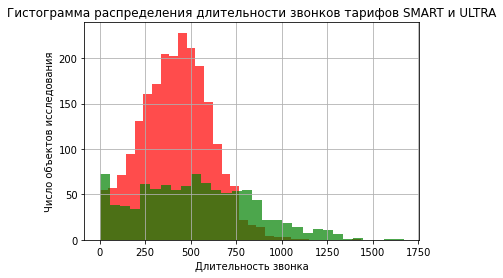

In [122]:
# Строим гистрограмму распределения по месяцам по длительности звонков тарифа smart
df_smart['calls_duration'].hist(bins=30, alpha=0.7, facecolor='r')
#plt.title('Гистограмма распределения длительности звонков тарифа SMART')
#plt.xlabel('Длительность звонка')
#plt.ylabel('Число объектов исследования')
#plt.show()

# Строим гистрограмму распределения по месяцам по длительности звонков тарифа ultra
df_ultra['calls_duration'].hist(bins=30, alpha=0.7, facecolor='g')
plt.title('Гистограмма распределения длительности звонков тарифов SMART и ULTRA')
plt.xlabel('Длительность звонка')
plt.ylabel('Число объектов исследования')
plt.show()

<div class="alert alert-block alert-warning">
<b>Совет: </b> Попробуй наложить два графика друг на друга, так различия будут наиболее явны
</div>

<div class="alert alert-info">
<b> Комментарий от студента </b>
    
Наложил. Получилось, действительно, более информативно! Спасибо!
</div>

Выводы по полученным гистограммам:
1. Распределения длительности звонков тарифа SMART является нормальным;
2. Распределение длительности звонков тарифа ULTRA косвенно является нормальным. Присутствуют выбросы;
3. Средняя длительность звонков у тарифа SMART находится в районе 500 минут в месяц;
4. У пользователей тарифа ULTRA встречается выброс на нулевом значении длительности звонков;
5. Наиболее часто встречающаяся продолжительность звонков находится в диапазоне от 250 до 800 минут;

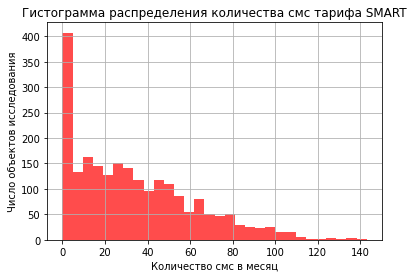

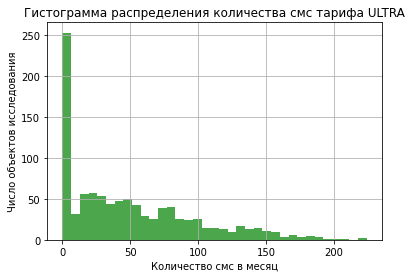

,user_id,month,calls_duration,calls_count,messages_count,gb_used,age,churn_date,city,reg_date,tariff,profit
0,1000,5,159,22,22,3,52,2038-01-19,Краснодар,2018-05-25,ultra,1950
1,1000,6,172,43,60,23,52,2038-01-19,Краснодар,2018-05-25,ultra,1950
2,1000,7,340,47,75,14,52,2038-01-19,Краснодар,2018-05-25,ultra,1950
3,1000,8,408,52,81,14,52,2038-01-19,Краснодар,2018-05-25,ultra,1950
4,1000,9,466,58,57,15,52,2038-01-19,Краснодар,2018-05-25,ultra,1950
...,...,...,...,...,...,...,...,...,...,...,...,...
364,1057,7,781,110,29,17,43,2038-01-19,Москва,2018-03-12,ultra,1950
382,1060,11,371,46,12,13,46,2038-01-19,Калуга,2018-11-24,ultra,1950
383,1060,12,1233,184,52,43,46,2038-01-19,Калуга,2018-11-24,ultra,3900
397,1063,9,820,121,0,26,45,2018-12-11,Тула,2018-04-12,ultra,1950


In [123]:
# Строим гистрограмму распределения по месяцам по количеству смс тарифа smart
df_smart['messages_count'].hist(bins=30, alpha=0.7, facecolor='r')
plt.title('Гистограмма распределения количества смс тарифа SMART')
plt.xlabel('Количество смс в месяц')
plt.ylabel('Число объектов исследования')
plt.show()

# Строим гистрограмму распределения по месяцам по количеству смс тарифа ultra
df_ultra['messages_count'].hist(bins=35, alpha=0.7, facecolor='g')
plt.title('Гистограмма распределения количества смс тарифа ULTRA')
plt.xlabel('Количество смс в месяц')
plt.ylabel('Число объектов исследования')
plt.show()

df_ultra.head(100)

Выводы по полученным гистограммам:
1. На гистограммах видны выбросы на нулевой отметке числа смс в месяц. Это говорит о том, что большАя часть клиентов не пользуются смс сообщениями вовсе. 
2. У клиентов тарифа SMART присутствует большАя доля клиентов, которые выходят за ежемесячную планку в 50 сообщений и, следовательно, доплачивают за сообщения.
3. Клиенты тарифа ULTRA отправляют в месяц не более 200 сообщений, при доступной 1000. Следовательно, можно сделать вывод, что клиенты тарифа ULTRA не вносят дополнительный доход за покупку смс сообщений сверх тарифа. Общая планка доступных в рамках тарифа сообщений в месяц сильно завышена.
4. Полученные графики демонстрируют распределение Пуассона.

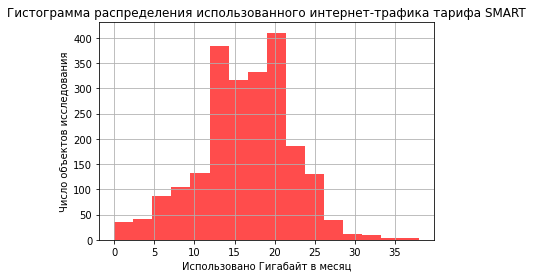

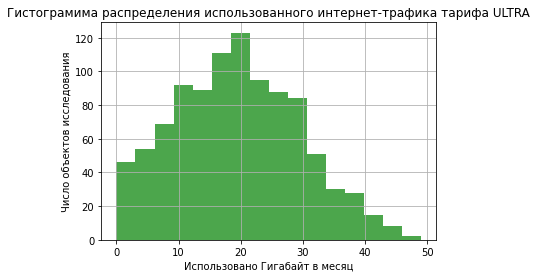

In [124]:
# Строим гистрограмму распределения по месяцам по количеству использованного интернет-трафика тарифа smart
df_smart['gb_used'].hist(bins=16, alpha=0.7, facecolor='r')
plt.title('Гистограмма распределения использованного интернет-трафика тарифа SMART')
plt.xlabel('Использовано Гигабайт в месяц')
plt.ylabel('Число объектов исследования')
plt.show()

# Строим гистрограмму распределения по месяцам по количеству использованного интернет-трафика тарифа ultra
df_ultra['gb_used'].hist(bins=16, alpha=0.7, facecolor='g')
plt.title('Гистограмима распределения использованного интернет-трафика тарифа ULTRA')
plt.xlabel('Использовано Гигабайт в месяц')
plt.ylabel('Число объектов исследования')
plt.show()

Выводы по полученным гистограммам:
1. Оба распределения являются нормальными.
2. Пользователи тарифа SMART чаще всего тратят от 13 до 22 Гигабайт в месяц. В рамках тарифного плана предусмотрено 15 Гигабайт трафика. Более половины клиентов тарифа SMART покупают дополнительный интернет-трафик по цене 200 рублей за Гигабайт.
3. Пользователи тарифа ULTRA чаще всего тратят 20 Гигабайт в месяц. В рамках тарифвного плана предусмотрено 30 Гигабайт трафика. БОльшая часть клиентов тарифа укладывается в пакет тарифа, однако присутствует и доля клиентов, докупающих Гигабайты сверх тарифа по цене 150 рублей в месяц.

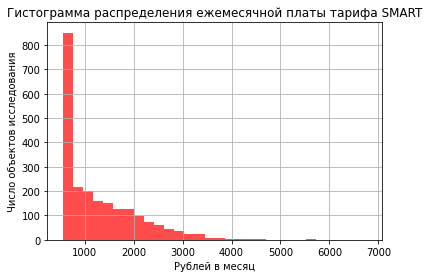

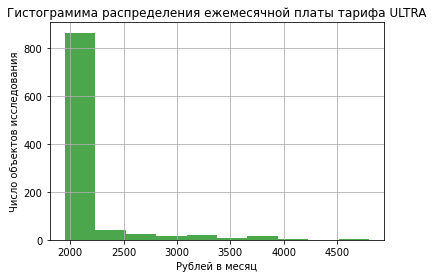

In [125]:
# Строим гистрограмму распределения по месяцам по выручке тарифа smart
df_smart['profit'].hist(bins=30, alpha=0.7, facecolor='r')
plt.title('Гистограмма распределения ежемесячной платы тарифа SMART')
plt.xlabel('Рублей в месяц')
plt.ylabel('Число объектов исследования')
plt.show()

# Строим гистрограмму распределения по месяцам по выручке тарифа ultra
df_ultra['profit'].hist(bins=10, alpha=0.7, facecolor='g')
plt.title('Гистограмима распределения ежемесячной платы тарифа ULTRA')
plt.xlabel('Рублей в месяц')
plt.ylabel('Число объектов исследования')
plt.show()

Выводы по полученным гистограммам:
1. Распределение Пуассона на обеих гистограммах;
2. Пользователи тарифи SMART чаще доплачивают за покупку дополнительных услуг;
3. Преобладающее большинство клиентов тарифа ULTRA не доплачивают за дополнительные услуги.

In [126]:
# Посчитаем доли пользователей по тарифам, выходящих за рамки пакета

smart_share_calls = int(df_smart.query('calls_duration > 500').shape[0] / df_smart.shape[0] * 100)
smart_share_sms = int(df_smart.query('messages_count > 50').shape[0] / df_smart.shape[0] * 100)
smart_share_gb = int(df_smart.query('gb_used > 15').shape[0] / df_smart.shape[0] * 100)
smart_share_profit = int(df_smart.query('profit > 550').shape[0] / df_smart.shape[0] * 100)

ultra_share_calls = int(df_ultra.query('calls_duration > 3000').shape[0] / df_ultra.shape[0] * 100)
ultra_share_sms = int(df_ultra.query('messages_count > 1000').shape[0] / df_ultra.shape[0] * 100)
ultra_share_gb = int(df_ultra.query('gb_used > 15').shape[0] / df_ultra.shape[0] * 100)
ultra_share_profit = int(df_ultra.query('profit > 1950').shape[0] / df_ultra.shape[0] * 100)

df_table = pd.DataFrame({'Тариф': ['Smart', 'Ultra'], 
                         'Доля переплаты за звонки, %': [smart_share_calls, ultra_share_calls], 
                         'Доля переплаты за смс, %': [smart_share_sms, ultra_share_sms], 
                         'Доля переплаты за интернет, %': [smart_share_gb, ultra_share_gb], 
                         'Доля переплаты за пакет, %': [smart_share_profit, ultra_share_profit]})

display(df_table)

,Тариф,"Доля переплаты за звонки, %","Доля переплаты за смс, %","Доля переплаты за интернет, %","Доля переплаты за пакет, %"
0,Smart,33,25,58,74
1,Ultra,0,0,64,13


Выводы по полученной таблице:
1. 33% клиентов тарифа SMART докупают минуты сверх пакета;
2. 25% клиетов тарифа SMART докупают смс сверх пакета;
3. Более половины клиентов тарифа SMART (58%) докупают гигабайты сверх пакета;
4. Клиенты тарифа ULTRA не докупают минуты и смс вовсе;
5. Небольшая доля клиентов тарифа ULTRA (13%) докупают гигабайты сверх пакета.
6. 74% пользователей тарифа SMART доплачивают за доп. услуги;
7. 13% клиентов тарифа ULTRA доплачивают за доп. услуги.

<div class="alert alert-block alert-success">
<b>Успех:</b> Отличная визуализация!
</div>

### 3.2. Расчет метрик

Перейдем к более точным расчетам средних значений, дисперсии и стандартного отклонения для клиентов двух тарифов.

In [127]:
# Расчитаем основные метрики
df_pivot = df.pivot_table(index='tariff', values='profit', aggfunc=['mean', 'var', 'std']).astype(int).reset_index()
display(df_pivot)

,tariff,mean,var,std
,,profit,profit,profit
0,smart,1289,669785,818
1,ultra,2070,141516,376


### Выводы

В рамках работы над данной главой было получено основное представление о полученной выборке данных. 

Что сделано в рамках 3 главы:
* Построили гистограммы по основным параметрам двух тарифов;
* Расчитали доли клиентов, выходящих за рамки пакета;
* Посчитали для выручки: среднее, дисперсию, стандартное отклонени;е
* Сформулировали выводы по каждому из пунктов.

Что удалось заметить:
* Пользователи тарифа SMART значительно чаще докупают дополнительные услуги сверх пакета;
* Пользователи тарифа ULTRA тратят немного больше интернет-трафика в течении месяца;
* Пользователи тарифа ULTRA совсем не докупают минуты и смс;
* Пользователи тарифа SMART тратят, в среднем, 1289 рублей в месяц;
* Пользователи тарифа ULTRA тратят, в среднем, 2070 рублей в месяц.

<div class="alert alert-block alert-success">
<b>Успех:</b> Да, похоже наши юзеры достаточно сильно различаются.
</div>

## 4. Проверка гипотез
### 4.1. Проверка гипотезы №1

Гипотеза №1: "Средняя выручка пользователей тарифов ULTRA и SMART **различаются**".

Сформулируем нулевую и альтернативную гипотезы:
* H0 - Средняя выручка пользователей тарифов ULTRA и SMART **равны**.
* H1 - Средняя выручка пользователей тарифов ULTRA и SMART **не равны**.

<div class="alert alert-block alert-success">
<b>Успех:</b> Гипотезы сформулированы верно. Порадовало постановка гипотез в терминах Н0 и Н1
</div>

In [128]:
# Проверим гипотезу №1

alpha = .05

results_1 = st.ttest_ind(
    df_smart['profit'], 
    df_ultra['profit'])

print('p-значение: ', results_1.pvalue)

if results_1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение:  1.4229814360764067e-160
Отвергаем нулевую гипотезу.


#### Вывод:
* Сформулированная нами нулевая гипотеза H0 (средняя выручка пользователей тарифов ULTRA и SMART **равны**) была отвергнута;
* Полученные данные не отвергают и не противоречат сформулированной в ТЗ гипотезе: средняя выручка пользователей тарифов ULTRA и SMART **различаются**.

### 4.2. Проверка гипотезы №2

Гипотеза №2: "Средняя выручка пользователей из Москвы **отличается** от других регионов".

Сформулируем нулевую и альтернативную гипотезы:
* H0 - Средняя выручка пользователей из Москвы **равна** средней выручке пользователей из других регионов.
* H1 - Средняя выручка пользователей из Москвы **не равна** средней выручке пользователей из других регионов.

<div class="alert alert-block alert-success">
<b>Успех:</b> Снова верная гипотеза, две из двух!
</div>

In [129]:
# Выделим два дополнительных датафрема

df_moscow = df.query('city == "Москва"')
df_other = df.query('city != "Москва"')

In [130]:
# Проверим гипотезу №2

alpha = .05

results_2 = st.ttest_ind(
    df_moscow['profit'], 
    df_other['profit'])

print('p-значение: ', results_2.pvalue)

if results_2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение:  0.5440152911670224
Не получилось отвергнуть нулевую гипотезу.


#### Вывод:
* Сформулированная нами нулевая гипотеза H0 (средняя выручка пользователей из Москвы **равна** средней выручке пользователей из других регионов) не была отвергнута;
* Полученные данные показывают крайне маловероятные результаты сформулированной в ТЗ гипотезы: cредняя выручка пользователей из Москвы **отличается** от других регионов (при условии, что гипотеза верна). 

## 5. Общий выводы

Была проделана большая работа по анализу двух тарифных планов: "Ультра" и "Смарт" компании "Мегалайн". Подведем итоги работы.

**Предобработка данных:**
* Была выполнена предобработка выборки данных;
* Были посчитаны дополнительные показатели по месяцам (потраченные минуты, смс, гигабайты).

**Получение метрик:**
* Были построены гистограммы по основным данным по месяцам;
* Были посчитаны доли пользователей по тарифам, докупающие дополнительные услуги за пределами тарифного пакета;
* Были расчитаны средние, дисперсия, стандартное отклонение по двум тарифам.


**Проверка гипотез:**
* Были проверены две сформулированные в ТЗ гипотезы.

**Итоговые выводы по работе от аналитика:**
* Пользователи тарифа SMART значительно чаще (в сравнении с клиентами тарифа ULTRA) докупают дополнительные услуги сверх пакета;
* Пользователи тарифа ULTRA совсем не докупают минуты и смс;
* Пользователи тарифа SMART тратят, в среднем, 1289 рублей в месяц;
* Пользователи тарифа ULTRA тратят, в среднем, 2070 рублей в месяц;
* Тариф ULTRA приносит компании больше денег;
* С большой вероятностью средняя выручка пользователей тарифов "Ультра" и "Смарт" - отличаются.
* Крайне маловероятно, что выручка клиентов из Москвы отличается от выручки клиентов из других регионов.

<div class="alert alert-block alert-success">
<b>Успех:</b> Здорово, что построил подробные графики, так сразу можно оценить разницу в тарифах по разным срезам. Еще мне понравилось, что ты использовал собственные фукнции, подробно написал выводы по некоторым пунктам. Порадовало, что присутствует вывод про самый выгодный тариф, это то, что хотел узнать бизнес-заказчик. Ты выполнил все пункты работы, молодец! Критических замечаний немного, однако их важно исправить. Также есть немного желтых комментариев, которые стоит исправить. Думаю, ты справишься с этим быстро. Жду твою работу :) 
</div>